In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [4]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [8]:
!echo $LOCAL

/local/5170170


In [9]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5170170/sandbox’: File exists


In [10]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5170170/sandbox'

In [11]:
os.environ['LANLEP_HOME']=HOME

In [12]:
import data

In [20]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [21]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [23]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [24]:
traintest.num_dataset()

5

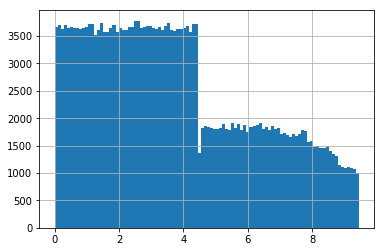

In [25]:
traintest.ydf.hist(bins=100);

In [26]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

2.0751427662143223

In [27]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [29]:
data=traintest.traindf
data.head()

fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_13_o13686688  0.153793  0.252002  0.115362 -0.135008  0.084726   
quake_11_o10971263  0.186869  0.232279  0.116231 -0.128347  0.081842   
quake_13_o2300617   0.205687  0.200959  0.109438 -0.078377  0.043451   
quake_11_o1146388   0.185285  0.209010  0.129064 -0.108109  0.060230   
quake_03_o14959363  0.171327  0.221359  0.125176 -0.098631  0.061466   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_13_o13686688 -0.021867 -0.005263  0.239939  0.171421 -0.142894  ...   
quake_11_o10971263 -0.029581 -0.003840  0.226696  0.162483 -0.092634  ...   
quake_13_o2300617  -0.137988 -0.009339  0.158783  0.181458 -0.020147  ...   
quake_11_o1146388  -0.080226 -0.029042  0.178731  0.170022 -0.066760  ...   
quake_03_o14959363 -0.084572 -0.004272  0.181916  0.169383 -0.055399  ...   

                      fwv_90    fwv_91    fwv_92    fwv_93    fwv_94  \
index                                                                  
quake_13_o13686688  0.109007  0.180867  0.027012  0.044774  0.028781   
quake_11_o10971263  0.093780  0.181602  0.060105  0.039644 -0.010936   
quake_13_o2300617   0.050201  0.184665  0.091970  0.057466 -0.050179   
quake_11_o1146388   0.070571  0.198318  0.072047  0.046459 -0.020315   
quake_03_o14959363  0.072691  0.167620  0.064355  0.057553 -0.031640   

                      fwv_95    fwv_96    fwv_97    fwv_98    fwv_99  
index                                                                 
quake_13_o13686688  0.006128  0.023644 -0.116737 -0.010711  0.164185  
quake_11_o10971263  0.023625  0.018926 -0.114227  0.001870  0.113800  
quake_13_o2300617   0.015093 -0.012664 -0.122463  0.020853  0.062428  
quake_11_o1146388   0.025861  0.020317 -0.107892  0.026311  0.074932  
quake_03_o14959363  0.023935  0.004552 -0.120380  0.007215  0.118175  

[5 rows x 100 columns]

In [41]:
ydf=traintest.ydf
ydf.head()

index
quake_13_o13686688    0.905300
quake_11_o10971263    1.610999
quake_13_o2300617     3.863199
quake_11_o1146388     4.163498
quake_03_o14959363    0.575696
Name: y, dtype: float64

In [36]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_13_o13686688     13
quake_11_o10971263     11
quake_13_o2300617      13
quake_11_o1146388      11
quake_03_o14959363      3

In [40]:
qdf['index'].value_counts().to_frame().sort_index().T

1      2      3      4      5     6      7      8      9      10  \
index  19245  19237  16770  19245  13679  9845  19242  13104  19245  19236   

          11     12     13     14     15  
index  19237  16652  15646  19244  19087

In [69]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{1: 19245,
 2: 19237,
 3: 16770,
 4: 19245,
 5: 13679,
 6: 9845,
 7: 19242,
 8: 13104,
 9: 19245,
 10: 19236,
 11: 19237,
 12: 16652,
 13: 15646,
 14: 19244,
 15: 19087}

In [37]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [43]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [56]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=qdf['index']==qno
    tridx=~teidx
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [57]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [58]:
validScores={}
for qno in quakes:
    s=train_quake(qno,params,n_thread)
    print "quake ", qno,s
    validScores[qno]=s

valid quake 1
(239469, 100) (239469,) (19245, 100) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.50542	valid_1's l1: 1.86419
[100]	training's l1: 1.33442	valid_1's l1: 1.73962
[150]	training's l1: 1.25686	valid_1's l1: 1.68353
[200]	training's l1: 1.21177	valid_1's l1: 1.65092
[250]	training's l1: 1.18256	valid_1's l1: 1.6307
[300]	training's l1: 1.15967	valid_1's l1: 1.61854
[350]	training's l1: 1.14125	valid_1's l1: 1.61068
[400]	training's l1: 1.12441	valid_1's l1: 1.60633
[450]	training's l1: 1.10889	valid_1's l1: 1.60326
[500]	training's l1: 1.09427	valid_1's l1: 1.60321
[550]	training's l1: 1.08087	valid_1's l1: 1.60313
[600]	training's l1: 1.06874	valid_1's l1: 1.6034
[650]	training's l1: 1.05747	valid_1's l1: 1.60444
Early stopping, best iteration is:
[469]	training's l1: 1.10314	valid_1's l1: 1.60229
quake  1 (1.6022889122941812, 469)
valid quake 2
(239477, 100) (239477,) (19237, 100) (19237,)
Training until validation scores don

Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.53955	valid_1's l1: 1.54892
[100]	training's l1: 1.37228	valid_1's l1: 1.34437
[150]	training's l1: 1.29541	valid_1's l1: 1.24089
[200]	training's l1: 1.25011	valid_1's l1: 1.18488
[250]	training's l1: 1.21958	valid_1's l1: 1.15385
[300]	training's l1: 1.19578	valid_1's l1: 1.13959
[350]	training's l1: 1.1761	valid_1's l1: 1.1323
[400]	training's l1: 1.15874	valid_1's l1: 1.12882
[450]	training's l1: 1.14217	valid_1's l1: 1.1266
[500]	training's l1: 1.12705	valid_1's l1: 1.12549
[550]	training's l1: 1.11301	valid_1's l1: 1.12417
[600]	training's l1: 1.09991	valid_1's l1: 1.12242
[650]	training's l1: 1.08766	valid_1's l1: 1.12166
[700]	training's l1: 1.07617	valid_1's l1: 1.12269
[750]	training's l1: 1.06535	valid_1's l1: 1.12213
[800]	training's l1: 1.05523	valid_1's l1: 1.12285
Early stopping, best iteration is:
[632]	training's l1: 1.09196	valid_1's l1: 1.12133
quake  9 (1.1213270586556103, 632)
vali

In [70]:
vdf=pd.DataFrame(validScores).T
vdf.columns=['score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf['qlen']=vdf.index.map(lambda u: qlen[u])
vdf=vdf.sort_values('score')

In [71]:
vdf

score  round   qlen
3   0.896695    295  16770
12  0.927736    290  16652
13  0.961275    285  15646
9   1.121327    632  19245
8   1.255772     57  13104
5   1.367528     83  13679
6   1.450380     38   9845
11  1.500292      0  19237
10  1.503078      0  19236
1   1.602289    469  19245
4   1.701720      0  19245
15  1.707571    288  19087
2   1.751423      0  19237
7   1.851908      0  19242
14  1.996369    154  19244

The orignal folds is [[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]], fold 3 is of all hard parts.

### let us use another feature

In [73]:
if 1:
    import data
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [74]:
data=traintest.traindf
data.head()

mean       std    max    min  mean_change_abs  \
index                                                                   
quake_13_o13686688  4.382653  6.531688   86.0  -89.0         0.000020   
quake_11_o10971263  4.536940  6.961360  140.0 -118.0        -0.000047   
quake_13_o2300617   4.729760  5.141578  116.0 -112.0         0.000047   
quake_11_o1146388   4.685747  7.012929  146.0 -118.0         0.000000   
quake_03_o14959363  4.583694  5.717625  105.0  -91.0         0.000007   

                    mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                     
quake_13_o13686688      75072.984375     89.0      0.0         6.316309   
quake_11_o10971263      74951.812500    140.0      0.0         7.460925   
quake_13_o2300617       74979.601562    116.0      0.0         4.957639   
quake_11_o1146388       75127.257812    146.0      0.0         4.439981   
quake_03_o14959363      74956.804688    105.0      0.0         5.590500   

                    std_last_50000  ...  std_roll_mean_1000  \
index                               ...                       
quake_13_o13686688        6.556305  ...            0.230279   
quake_11_o10971263        4.417322  ...            0.214798   
quake_13_o2300617         5.689728  ...            0.226683   
quake_11_o1146388         8.321937  ...            0.207837   
quake_03_o14959363        5.217244  ...            0.207115   

                    max_roll_mean_1000  min_roll_mean_1000  \
index                                                        
quake_13_o13686688               5.255               3.728   
quake_11_o10971263               5.378               3.798   
quake_13_o2300617                5.506               4.030   
quake_11_o1146388                5.488               4.021   
quake_03_o14959363               5.216               3.891   

                    q01_roll_mean_1000  q05_roll_mean_1000  \
index                                                        
quake_13_o13686688               3.898               4.019   
quake_11_o10971263               4.110               4.184   
quake_13_o2300617                4.227               4.384   
quake_11_o1146388                4.212               4.365   
quake_03_o14959363               4.074               4.207   

                    q95_roll_mean_1000  q99_roll_mean_1000  \
index                                                        
quake_13_o13686688               4.794               5.018   
quake_11_o10971263               4.881               5.019   
quake_13_o2300617                5.126               5.282   
quake_11_o1146388                5.024               5.251   
quake_03_o14959363               4.913               5.059   

                    av_change_abs_roll_mean_1000  \
index                                              
quake_13_o13686688                 -4.751678e-06   
quake_11_o10971263                  3.355705e-07   
quake_13_o2300617                   2.255033e-06   
quake_11_o1146388                   2.798658e-06   
quake_03_o14959363                  2.859060e-06   

                    av_change_rate_roll_mean_1000  abs_max_roll_mean_1000  
index                                                                      
quake_13_o13686688                   74629.539062                   5.255  
quake_11_o10971263                   74427.382812                   5.378  
quake_13_o2300617                    74549.632812                   5.506  
quake_11_o1146388                    74666.718750                   5.488  
quake_03_o14959363                   74485.789062                   5.216  

[5 rows x 137 columns]

In [75]:
ydf=traintest.ydf
ydf.head()

index
quake_13_o13686688    0.905300
quake_11_o10971263    1.610999
quake_13_o2300617     3.863199
quake_11_o1146388     4.163498
quake_03_o14959363    0.575696
Name: y, dtype: float64

In [76]:
qdf=pd.DataFrame(data.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=data.index)
qdf.head()

index
index                    
quake_13_o13686688     13
quake_11_o10971263     11
quake_13_o2300617      13
quake_11_o1146388      11
quake_03_o14959363      3

In [77]:
qdf['index'].value_counts().to_frame().sort_index().T

1      2      3      4      5     6      7      8      9      10  \
index  19245  19237  16770  19245  13679  9845  19242  13104  19245  19236   

          11     12     13     14     15  
index  19237  16652  15646  19244  19087

In [78]:
qlen=qdf['index'].value_counts().to_dict()
qlen

{1: 19245,
 2: 19237,
 3: 16770,
 4: 19245,
 5: 13679,
 6: 9845,
 7: 19242,
 8: 13104,
 9: 19245,
 10: 19236,
 11: 19237,
 12: 16652,
 13: 15646,
 14: 19244,
 15: 19087}

In [79]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [80]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [81]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=qdf['index']==qno
    tridx=~teidx
    
    Xtr,ytr,Xte,yte=data[tridx],ydf[tridx],data[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [82]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [83]:
validScores={}
for qno in quakes:
    s=train_quake(qno,params,n_thread)
    print "quake ", qno,s
    validScores[qno]=s

valid quake 1
(239469, 137) (239469,) (19245, 137) (19245,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.48592	valid_1's l1: 1.89074
[100]	training's l1: 1.30577	valid_1's l1: 1.78253
[150]	training's l1: 1.21437	valid_1's l1: 1.7321
[200]	training's l1: 1.14965	valid_1's l1: 1.70608
[250]	training's l1: 1.09924	valid_1's l1: 1.69366
[300]	training's l1: 1.05774	valid_1's l1: 1.68304
[350]	training's l1: 1.01991	valid_1's l1: 1.67832
[400]	training's l1: 0.983144	valid_1's l1: 1.68759
[450]	training's l1: 0.950282	valid_1's l1: 1.68281
[500]	training's l1: 0.920392	valid_1's l1: 1.68033
Early stopping, best iteration is:
[347]	training's l1: 1.02214	valid_1's l1: 1.67739
quake  1 (1.6773939052734965, 347)
valid quake 2
(239477, 137) (239477,) (19237, 137) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.47967	valid_1's l1: 1.91453
[100]	training's l1: 1.29604	valid_1's l1: 1.8648
[150]	training's l1: 1

[450]	training's l1: 0.952433	valid_1's l1: 1.57739
[500]	training's l1: 0.926395	valid_1's l1: 1.57491
[550]	training's l1: 0.901093	valid_1's l1: 1.57151
[600]	training's l1: 0.878401	valid_1's l1: 1.5727
[650]	training's l1: 0.856871	valid_1's l1: 1.57221
[700]	training's l1: 0.834786	valid_1's l1: 1.57652
[750]	training's l1: 0.814438	valid_1's l1: 1.57565
Early stopping, best iteration is:
[551]	training's l1: 0.900636	valid_1's l1: 1.57149
quake  10 (1.571487408163628, 551)
valid quake 11
(239477, 137) (239477,) (19237, 137) (19237,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 1.49204	valid_1's l1: 1.77502
[100]	training's l1: 1.31154	valid_1's l1: 1.67625
[150]	training's l1: 1.21543	valid_1's l1: 1.64599
[200]	training's l1: 1.15498	valid_1's l1: 1.6287
[250]	training's l1: 1.1057	valid_1's l1: 1.61567
[300]	training's l1: 1.06337	valid_1's l1: 1.60756
[350]	training's l1: 1.02645	valid_1's l1: 1.60625
[400]	training's l1: 0.992731	valid_1

In [84]:
vdf=pd.DataFrame(validScores).T
vdf.columns=['score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf['qlen']=vdf.index.map(lambda u: qlen[u])
vdf=vdf.sort_values('score')

In [85]:
vdf

score  round   qlen
13  0.997060    227  15646
12  1.001642    264  16652
3   1.044916    200  16770
9   1.135338    421  19245
5   1.273686     90  13679
8   1.350573     60  13104
6   1.470336     46   9845
10  1.571487    551  19236
11  1.598972    572  19237
1   1.677394    347  19245
4   1.717107      0  19245
2   1.768681      0  19237
15  1.914029    160  19087
7   1.938760    109  19242
14  2.053001    100  19244